In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)


In [23]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
recentdate= session.query(func.max(Measurement.date)).first()

therecentdate=dt.datetime.strptime(recentdate[0], '%Y-%m-%d')
therecentdate

datetime.datetime(2017, 8, 23, 0, 0)

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(year=therecentdate.year - 1, month=therecentdate.month, day=therecentdate.day)
year_ago


# Perform a query to retrieve the data and precipitation scores
ayear= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names

ayear_df=pd.DataFrame(ayear,columns=['date','precipitation'])

# Sort the dataframe by date
ayear_df.sort_values('date',inplace=True)
ayear_df.reset_index(drop=True)




,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


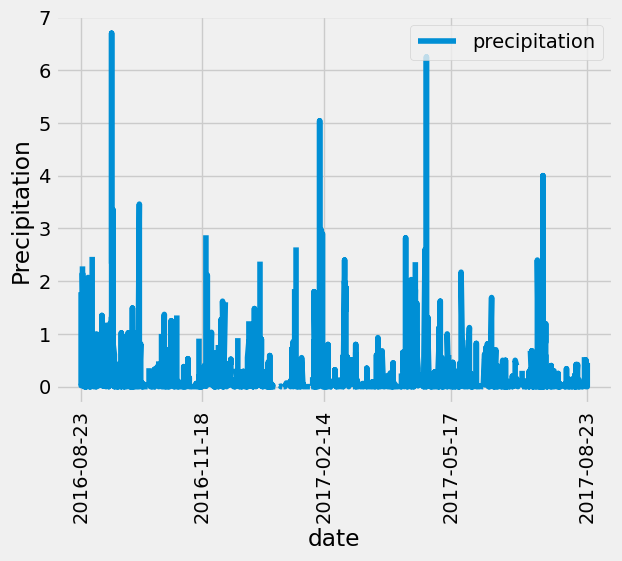

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(ayear_df['date'],ayear_df['precipitation'])

num_dates = len(ayear_df['date'])
step = num_dates // 4  

plt.xticks(ayear_df['date'][::step], labels=[date for date in ayear_df['date'][::step]], rotation=90)
plt.ylabel('Precipitation')
plt.xlabel('date')

plt.grid(True)
plt.legend(['precipitation'], loc='upper right')
plt.show()

In [33]:
# Use Pandas to calculate the summary statistics for the precipitation data
ayear_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
totalStation= session.query(Measurement.station).distinct().count()
totalStation

9

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
mostActive= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).\
    all()
mostActive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activestationid=mostActive[0][0]
mostActiveSta=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station==activestationid).first()
mostActiveSta

(54.0, 85.0, 71.66378066378067)

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = session.query(Measurement.date).\
    filter(Measurement.station == activestationid).\
    order_by(Measurement.date.desc()).\
    first()
last_date[0]

datelast_date=dt.datetime.strptime(last_date[0], '%Y-%m-%d')
year_agoMA = dt.date(year=datelast_date.year - 1, month=datelast_date.month, day=datelast_date.day)
year_agoMA

temperature = session.query(Measurement.tobs).\
    filter(Measurement.station == activestationid).\
    filter(Measurement.date >= year_agoMA).\
    all()
temperature
temperaturelist=[temp[0] for temp in temperature]
temperaturelist

[80.0,
 79.0,
 81.0,
 79.0,
 78.0,
 77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,

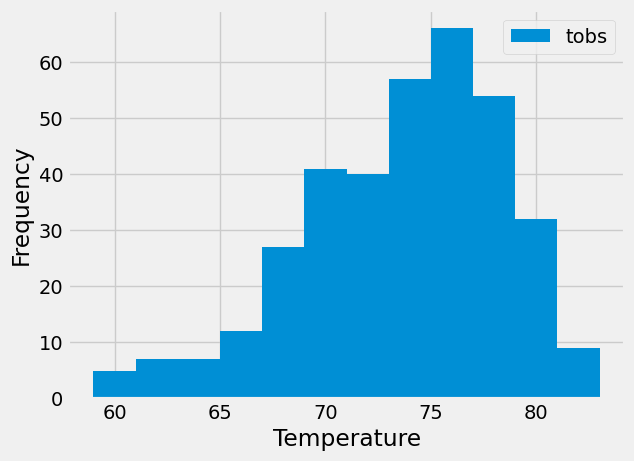

In [37]:
plt.hist(temperaturelist, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [38]:
# Close Session
session.close()